In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
base = pd.read_csv('Eleicao.csv', sep=';')
base

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300
5,Susan Sanders,0,200
6,Anthony Harris,1,1800
7,Philip Richardson,1,1700
8,Eugene Phillips,0,300
9,Mildred Morris,1,1800


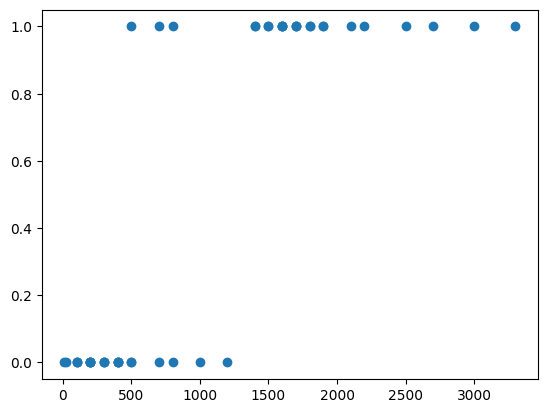

In [8]:
plt.scatter(base.DESPESAS, base.SITUACAO)

In [9]:
base.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


In [10]:
#Vendo a correlação entres as colunas
np.corrcoef(base.DESPESAS, base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [ ]:
# Criação das variaveis X e Y (variavel independente e variavel dependente)

X = base.iloc[ : , 2 ].values
X = X[:,np.newaxis]
Y = base.iloc[: , 1].values
X

In [39]:
# Instânciando a LogisticRegression
modelo = LogisticRegression()
#Treinando o modelo
modelo.fit(X,Y)
#Coeficiente angular(se é positivo ou negativo)
modelo.coef_
#Intercept(onde a linha bate no eixo Y)
modelo.intercept_

array([-4.60287217])

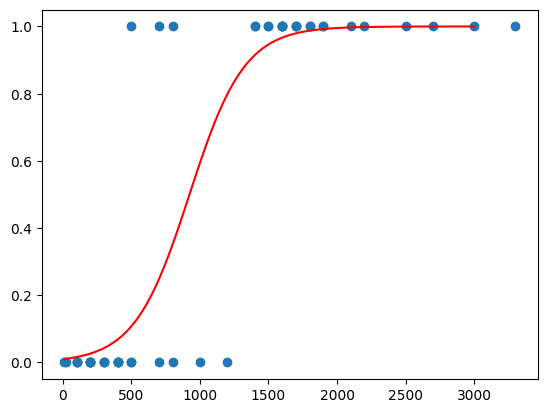

In [31]:
plt.scatter(X,Y)
#Geração de novos dados para gerar a sigmoide
X_teste = np.linspace(10,3000,100)

def model(x):
    return 1 / (1 + np.exp(-x))

r = model(X_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.plot(X_teste, r, color='red')

In [29]:
#Carregamento da base de dados com os novos candidatos
base_previsoes = pd.read_csv('NovosCandidatos.csv', sep=';')
base_previsoes

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900
5,F,1500
6,G,3000


In [35]:
#Mudança dos dados para matrix
despesas = base_previsoes.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)
#Previsões e geração da nova base de dados com os valores origianis e as previsões
previsões_teste = modelo.predict(despesas)
previsões_teste

array([0, 0, 0, 0, 0, 1, 1])

In [38]:
base_previsoes = np.column_stack((base_previsoes, previsões_teste))
base_previsoes

array([['A', 0, 0, 0],
       ['B', 10, 0, 0],
       ['C', 200, 0, 0],
       ['D', 500, 0, 0],
       ['E', 900, 0, 0],
       ['F', 1500, 1, 1],
       ['G', 3000, 1, 1]], dtype=object)